# Two year runs with a reduced number of visits

We did *not* reduce the number of requested visits when configuring the two year runs to explore the airmass and hour angle bonus values. We are concerned that by not scaling the requested number of visits down by a factor of 5 from the 10 year values, the two year runs were not representative behavior of the scheduler.

In this notebook we compare the following three runs:

* **colossus_2210**: 0.0 airmass bonus, 0.5 hour angle bonus, did not reduce the number of requested visits
* **colossus_2226**: 0.0 airmass bonus, 0.5 hour angle bonus, requested numbr of visits divided by 5.
* **colossus_2176**: 0.0 airmass bonus, 0.5 hour angle bonus, 10 year run.

All of these runs are WFD only.

## Sections:

* [Alt-Az sky maps](#Alt-Az-Sky-maps)
* [HA histograms](#HA-histograms)
* [NVisits in r band](#Nvisits-in-r-band)
* [Metric summary stats comparison](#Metric-summary-stats-comparison)

## Summary:

* Reducing the requested number visits results in a different pointing history during the survey.
* The 2 year run with the reduced number of visits (**colossus_2226**) takes more observations over a wider range of HA values with a nonsymmetrical HA distribution.
* **colossus_2210** is in good agreement with the first two years of the 10 year in Alt-Az pointing history, HA distribution, and the number of visits. 
* **colossus_2210** shows a non-uniformity in NVisits that does not appear in the full 10 year survey. 
* **colossus_2226** is *not* in good agreement with any of the 2 year portions of the 10 year in Alt-Az pointing history, HA distribution, or the number of visits. 
* The **colossus_2226** NVisits map is in better agreement with the full 10 year survey.
  * The non-uniformity seen in **colossus_2210** is not seen in **colossus_2226**.
  
  
* This analysis shows that we are limited in what we can conclude about the behavior of the scheduler over a full 10 year survey based on a 2 year run.
* Reducing the number of requested visits in the 2 year did do a better job of matching the sky coverage of the 10 year survey, but the nonsymmetrical HA distribution shows that there still not a straight extrapolation from a 2 year run to 10 year run.
* Breaking the 10 year run into 2 year sections also showed us that there is a change in the HA distribution over time, with the last 2 years being the most nonsymmetrical.

In [1]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
import lsst.sims.maf.utils as utils

/home/docmaf/stack/python/miniconda3-4.2.12/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from lsst.sims.maf.db import ResultsDb
from lsst.sims.maf.web import MafRunComparison

In [3]:
runnames = ['colossus_2210','colossus_2226']

In [4]:
comp = MafRunComparison(baseDir='.', runlist=runnames)

In [5]:
stats_df,metricDict = comp.combineSummaryStats('WideFastDeep',['airmass_bonus','hour_angle_bonus'])

Querying Config parameters with the following query:
paramName like "%WideFastDeep%airmass_bonus%" or paramName like "%WideFastDeep%hour_angle_bonus%"


/home/docmaf/userRepos/sims_maf/python/lsst/sims/maf/web/mafRunComparison.py:129: UserWarning: Warning: Found no metric results for Proper Motion 20 None None Median in run colossus_2226
  % (metricName, metricMetadata, slicerName, summaryName, r))
/home/docmaf/userRepos/sims_maf/python/lsst/sims/maf/web/mafRunComparison.py:129: UserWarning: Warning: Found no metric results for Parallax 24 All Visits (non-dithered) HealpixSlicer Median in run colossus_2226
  % (metricName, metricMetadata, slicerName, summaryName, r))
/home/docmaf/userRepos/sims_maf/python/lsst/sims/maf/web/mafRunComparison.py:129: UserWarning: Warning: Found no metric results for Proper Motion 24 None None Median in run colossus_2226
  % (metricName, metricMetadata, slicerName, summaryName, r))
/home/docmaf/userRepos/sims_maf/python/lsst/sims/maf/web/mafRunComparison.py:129: UserWarning: Warning: Found no metric results for Parallax Coverage 20 All Visits (non-dithered) HealpixSlicer Median in run colossus_2226
  % (me

In [6]:
stats_df

,airmass_bonus,hour_angle_bonus,FullRange HA g band,FullRange HA i band,FullRange HA r band,FullRange HA u band,FullRange HA y band,FullRange HA z band,Mean Slew Time,Median CoaddM5 g band,...,Median Parallax Coverage 20,Median Parallax Coverage 24,Median Slew Time,Median seeingFwhmEff i band,Median seeingFwhmEff r band,Meidan Prop. Mo. 20,Meidan Prop. Mo. 24,Nights with Observations,Total Eff Time,Total Visits
colossus_2210,0.0,0.5,1.629745,2.384953,1.688622,1.400338,4.771214,3.657674,8.725823,26.159562,...,0.571951,0.538051,5.407516,0.819197,0.852188,1.502694,13.508891,585.0,97.156834,446194.0
colossus_2226,0.0,0.5,4.167826,4.840925,4.462352,4.173527,5.397886,5.116233,8.894976,26.243236,...,NaN,NaN,5.447918,0.838787,0.853838,NaN,NaN,585.0,85.414390,444362.0


In [7]:
def nomalizeRun(rundf,parameterList,baselineRun):
    nparameters = len(parameterList)
    noramlize = ((rundf.iloc[:, nparameters:] - rundf.iloc[:, nparameters:].loc[baselineRun].values.squeeze())/
                 rundf.iloc[:, nparameters:].loc[baselineRun].values.squeeze())
    noramlizedf = pd.concat([rundf.iloc[:, 0:nparameters],noramlize], axis=1, 
                            join_axes=[rundf.iloc[:, 0:nparameters].index])
    return noramlizedf

In [8]:
stats_df_norm = nomalizeRun(stats_df,['airmass_bonus','hour_angle_bonus'],'colossus_2210')

In [9]:
def standardrunCompPlots(dataframe,output):
    magcols = [col for col in dataframe.columns if 'M5' in col]
    HAcols = [col for col in dataframe.columns if 'HA' in col]
    propMocols  = [col for col in dataframe.columns if 'Prop. Mo.' in col]
    seeingcols  = [col for col in dataframe.columns if 'seeing' in col]
    parallaxCols = [col for col in dataframe.columns if 'Parallax' in col]
    othercols = ['Mean Slew Time', 'Median Slew Time','Median NVists Per Night',
                 'Median Open Shutter Fraction','Nights with Observations', 'Total Eff Time']
    colsets = [othercols,magcols,HAcols,seeingcols]
    fig, axs = plt.subplots(len(colsets),1, figsize=(8, 33))
    fig.subplots_adjust(hspace=.4)
    axs = axs.ravel()
    for i,c in enumerate(colsets):
        x = np.arange(len(dataframe))
        for metric in dataframe[c].columns:
            axs[i].plot(x,dataframe[metric],marker='.',ms=10,label=metric)
        axs[i].grid(True)
        axs[i].set_ylabel('(run - 2210)/2210')
        lgd = axs[i].legend(loc=(1.02, 0.2),ncol=1)
        plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)
        plt.setp(axs[i],xticks=x,xticklabels=[x.strip('') for x in dataframe.index.values])

In [10]:
def overplotOneDHistograms(dataframe,outDirs,metricName,runList=False,labelList=None,metadata=None,
                           opsim=False,logScale=False,normalize=False):
    if runList == True:
        runNames = dataframe
    else:
        runNames = dataframe.index
    cmap = plt.cm.get_cmap('gist_rainbow_r')
    bundles = {}
    p = plots.OneDBinnedData()
    maxYvalues = np.ones(len(runNames)) 
    for i,run in enumerate(runNames):
        if metadata:
            metadatastr = '_'+metadata
        else:
            metadatastr = ''
        if opsim:
            metricFile = 'opsim'+'_'+metricName+metadatastr+'_ONED'+'.npz'
        else:
            metricFile = run+'_'+metricName+metadatastr+'_ONED'+'.npz'
        bundles[run+'_'+str(i)] = metricBundles.createEmptyMetricBundle()
        bundles[run+'_'+str(i)].read(run+outDirs[i]+metricFile)
        maxYvalues[i] = bundles[run+'_'+str(i)].metricValues.compressed().max()
    for k,runPlot in enumerate(runNames):
        runPlot = runPlot+'_'+str(k)
        if labelList:
            label = labelList[k]
        else:
            label = "%s %.2f %.2f" % (runPlot,dataframe.loc[runPlot]['airmass_bonus'],
                                      dataframe.loc[runPlot]['hour_angle_bonus'])

        if normalize == False:
            metricValues = bundles[runPlot].metricValues
            yMax = np.max(maxYvalues)
        else:
            metricValues = (bundles[runPlot].metricValues)/(bundles[runPlot].metricValues.compressed().max())
            yMax = 1.1   
        p(metricValues, slicer=bundles[runPlot].slicer,
          userPlotDict={'color': cmap(k/len(runNames)),
                        'label':label,'linewidth':3,
                        'yMax':yMax,
                        'logScale': logScale},fignum=1)

In [11]:
def subplotSkyMaps(dataframe,outDirs,metricName,nrows,ncols,slicerAbrv='HEAL',
                   metadata=None,opsim=False,titleList=None,labelList=None,figsize=None,
                   colorbarRun=None,runList=False):
    if runList == True:
        runNames = dataframe
    else:
        runNames = dataframe.index
    bundles = {}
    userPlotDict = {}
    userPlotDict['figsize'] = figsize
    if slicerAbrv == 'HEAL':
        p = plots.HealpixSkyMap()
    if ((slicerAbrv == 'HEAL') & ('Alt_Az' in metricName)):
        userPlotDict['rot'] = (0, 90, 0)
    if slicerAbrv == 'OPSI': 
        p = plots.BaseSkyMap()
    for i,run in enumerate(runNames):
        if metadata:
            metadatastr = '_'+metadata
        else:
            metadatastr = ''
        if opsim:
            metricFile = 'opsim'+'_'+metricName+metadatastr+'_'+slicerAbrv+'.npz'
        else:
            metricFile = run+'_'+metricName+metadatastr+'_'+slicerAbrv+'.npz'
        bundles[run+'_'+str(i)] = metricBundles.createEmptyMetricBundle()
        bundles[run+'_'+str(i)].read(run+outDirs[i]+metricFile)
    fig = plt.figure(1, figsize=userPlotDict['figsize'])
    if colorbarRun:
        userPlotDict['colorMin'] = bundles[run+'_'+str(i)].metricValues.compressed().min()
        userPlotDict['colorMax'] = bundles[run+'_'+str(i)].metricValues.compressed().max()
    for k,runPlot in enumerate(runNames):
        runPlot = runPlot+'_'+str(k)
        userPlotDict['sub'] = (nrows,ncols,k+1)
        if metadata:
            userPlotDict['xlabel'] = bundles[runPlot].metric.name+' ('+metadata+')'
        else:
            userPlotDict['xlabel'] = bundles[runPlot].metric.name
        if titleList:
            userPlotDict['title'] = titleList[k]
        else:
            userPlotDict['title'] = "%s %.2f %.2f" % (runPlot,dataframe.loc[runPlot]['airmass_bonus'],
                                                      dataframe.loc[runPlot]['hour_angle_bonus'])
        
        p(bundles[runPlot].metricValues, slicer=bundles[runPlot].slicer, userPlotDict=userPlotDict,fignum=1)
        
    plt.suptitle(bundles[runPlot].displayDict['caption'])
#     fig.subplots_adjust(hspace=0.1)

In [17]:
runlist = ['colossus_2210','colossus_2226','colossus_2176','colossus_2176','colossus_2176','colossus_2176']
outDirs = ['/sched/','/sched/','/split/','/midtwo/','/lasttwo/','/sched/']
labelList = ['colossus_2210 0.0 0.5','colossus_2226 0.0 0.5 (reduced visits)',
             'colossus_2176 0.0 0.5 (1st 2yrs)',
             'colossus_2176 0.0 0.5 (mid 2yrs)',
             'colossus_2176 0.0 0.5 (last 2yrs)',
             'colossus_2176 0.0 0.5 (full)']

# Alt-Az Sky-maps

The following plot shows the alt-az pointing history for all filters for each of the runs. The title for each subplot gives the run name, airmass bonus, and hour angle bonus.

For the 10 year run (**colossus_2176**), we show the sky map for the 1st 2 years, the middle 2 years (4-6), the last 2 years, and the entire survey, in that order. The portion of the 10 year survey plotted is noted in the subplot titles.

These maps clearly show that reducing the number of requested visits changes the pointing history of the survey. 
**colossus_2226** (2 years, reduced visits), has more pointings over a larger range of HA values extending farther into the west compared to **colossus_2210** (2 years).

The 1st and last two years of the 10 year run (**colossus_2176**) also show different pointing histories with the last two years being spread over a larger HA range. The pointings during the first two years of the 10 year run do look very similar to two year run withough the reduced number of visits (**colossus_2210**).

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


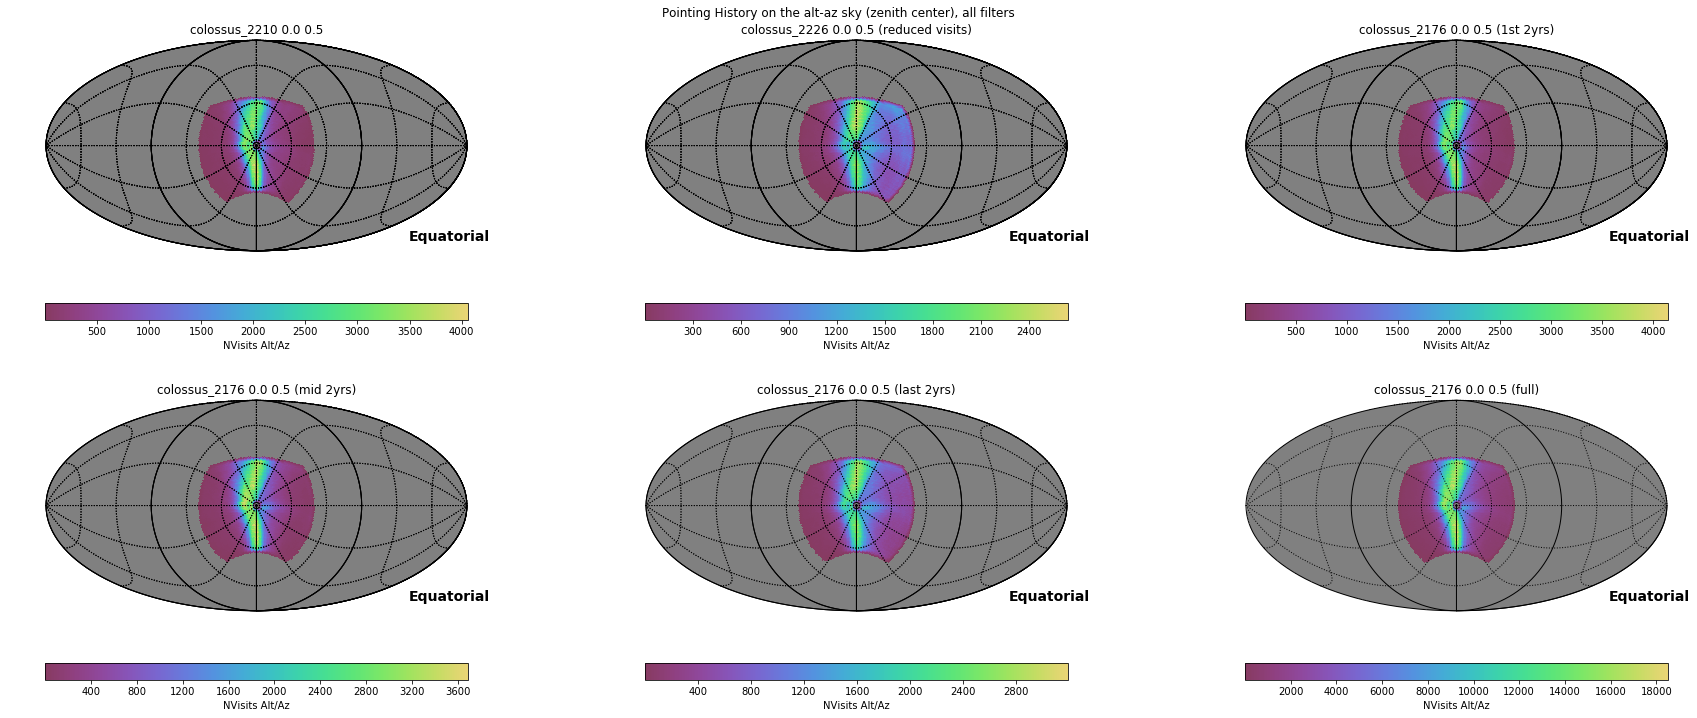

In [19]:
subplotSkyMaps(runlist,outDirs,metricName='NVisits_Alt_Az',nrows=2,ncols=3,
               metadata=None,titleList=labelList,slicerAbrv='HEAL',
               opsim=False,figsize=(25,10),runList=True)

# HA histograms
The next figure overplots the hour angle histograms in *g*, *r*, *i*, and *z* for each of the runs. The histograms further illustrate what was shown by the sky maps above. 

The full 10 years, first 2 years, and 2 year run without reduced visits have similar HA distributions. Again we see that the last 2 years and the 2 year run with a reduced visits show a wider range of HA values with a bump at
more negative HA values.

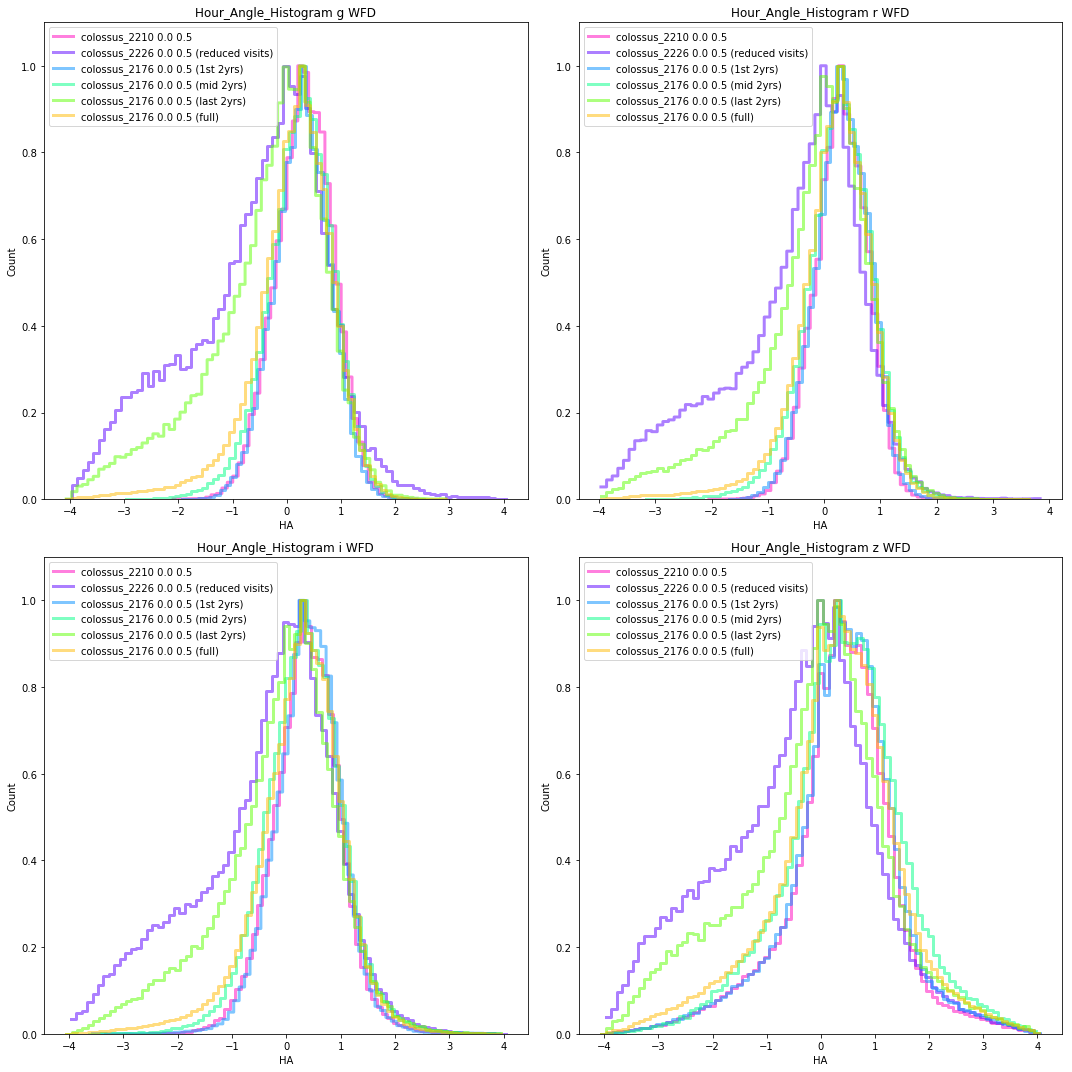

In [20]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot(221)
overplotOneDHistograms(runlist,outDirs=outDirs,runList=True,labelList=labelList,
                       metricName='Hour_Angle_Histogram',metadata='g_band_all_props',opsim=False,normalize=True)
ax1.set_xlabel('HA')
ax1.set_ylabel('Count')
ax1.set_title('Hour_Angle_Histogram g WFD')
ax1.legend()

ax2 = plt.subplot(222)
overplotOneDHistograms(runlist,outDirs=outDirs,runList=True,labelList=labelList,
                       metricName='Hour_Angle_Histogram',metadata='r_band_all_props',opsim=False,normalize=True)
ax2.set_xlabel('HA')
ax2.set_ylabel('Count')
ax2.set_title('Hour_Angle_Histogram r WFD')
ax2.legend()

ax3 = plt.subplot(223)
overplotOneDHistograms(runlist,outDirs=outDirs,runList=True,labelList=labelList,
                       metricName='Hour_Angle_Histogram',metadata='i_band_all_props',opsim=False,normalize=True)
ax3.set_xlabel('HA')
ax3.set_ylabel('Count')
ax3.set_title('Hour_Angle_Histogram i WFD')
ax3.legend()

ax4 = plt.subplot(224)
overplotOneDHistograms(runlist,outDirs=outDirs,runList=True,labelList=labelList,
                       metricName='Hour_Angle_Histogram',metadata='z_band_all_props',opsim=False,normalize=True)
ax4.set_xlabel('HA')
ax4.set_ylabel('Count')
ax4.set_title('Hour_Angle_Histogram z WFD')
ax4.legend()

plt.tight_layout()
# plt.savefig('airmass_bonus_comparisons.pdf')

# Nvisits in r band

These sky maps show the number of visits in *r* for each of the runs. Note that the colorbars have not been set to the same range.

The **colossus_2210** map shows that the HA bonus causes a non-uniformity in the number of visits fields get across the sky. A similar pattern of non-uniformity is seen in the 1st 2 years of the 10 year run shown by the last panel in the first row. This pattern is not seen in the reduced visits run, or the sky map for the full 10 years of **colossus_2176**.

/home/docmaf/userRepos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:545: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(plotDict['bgcolor'])


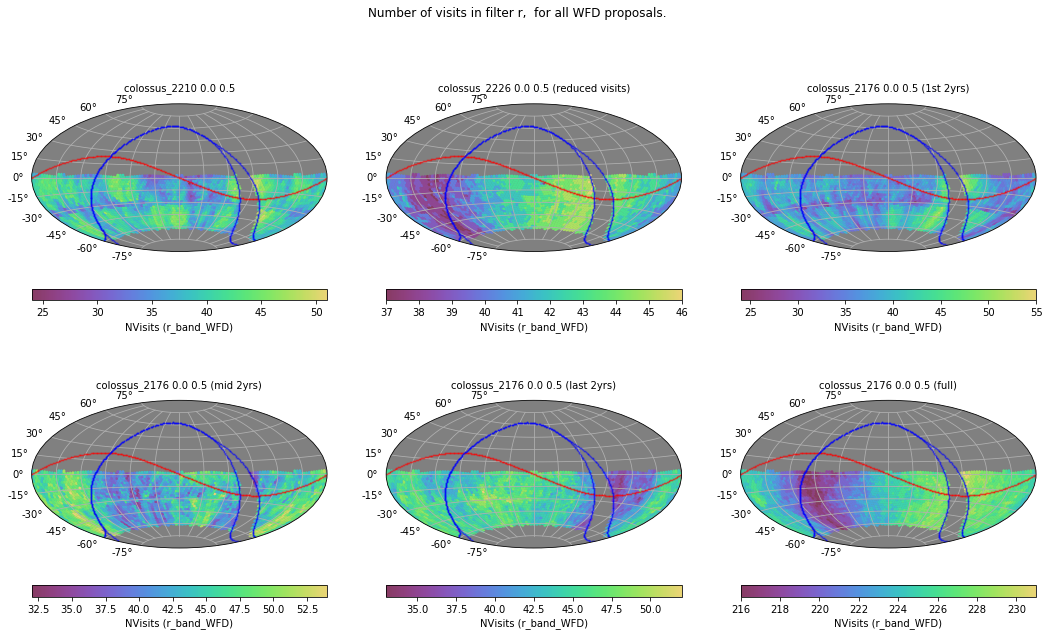

In [21]:
subplotSkyMaps(runlist,outDirs,'NVisits',nrows=2,ncols=3,
               metadata='r_band_WFD',slicerAbrv='OPSI',opsim=False,
               figsize=(18,10),runList=True,titleList=labelList)

Below is a similar analysis to what was shown for all of the 2 years over the grid of HA and hour angle bonus values. Here only **colussus_2210** is compared with **colossus_2226**. The summary metric values have been normalized to the **colussus_2210**. The most dramatic change between the two runs is the decrease in total effective time in **colossus_2226**. This is likely tied to the wider range of HA values used by this survey as shown from the maps above.

# Metric summary stats comparison

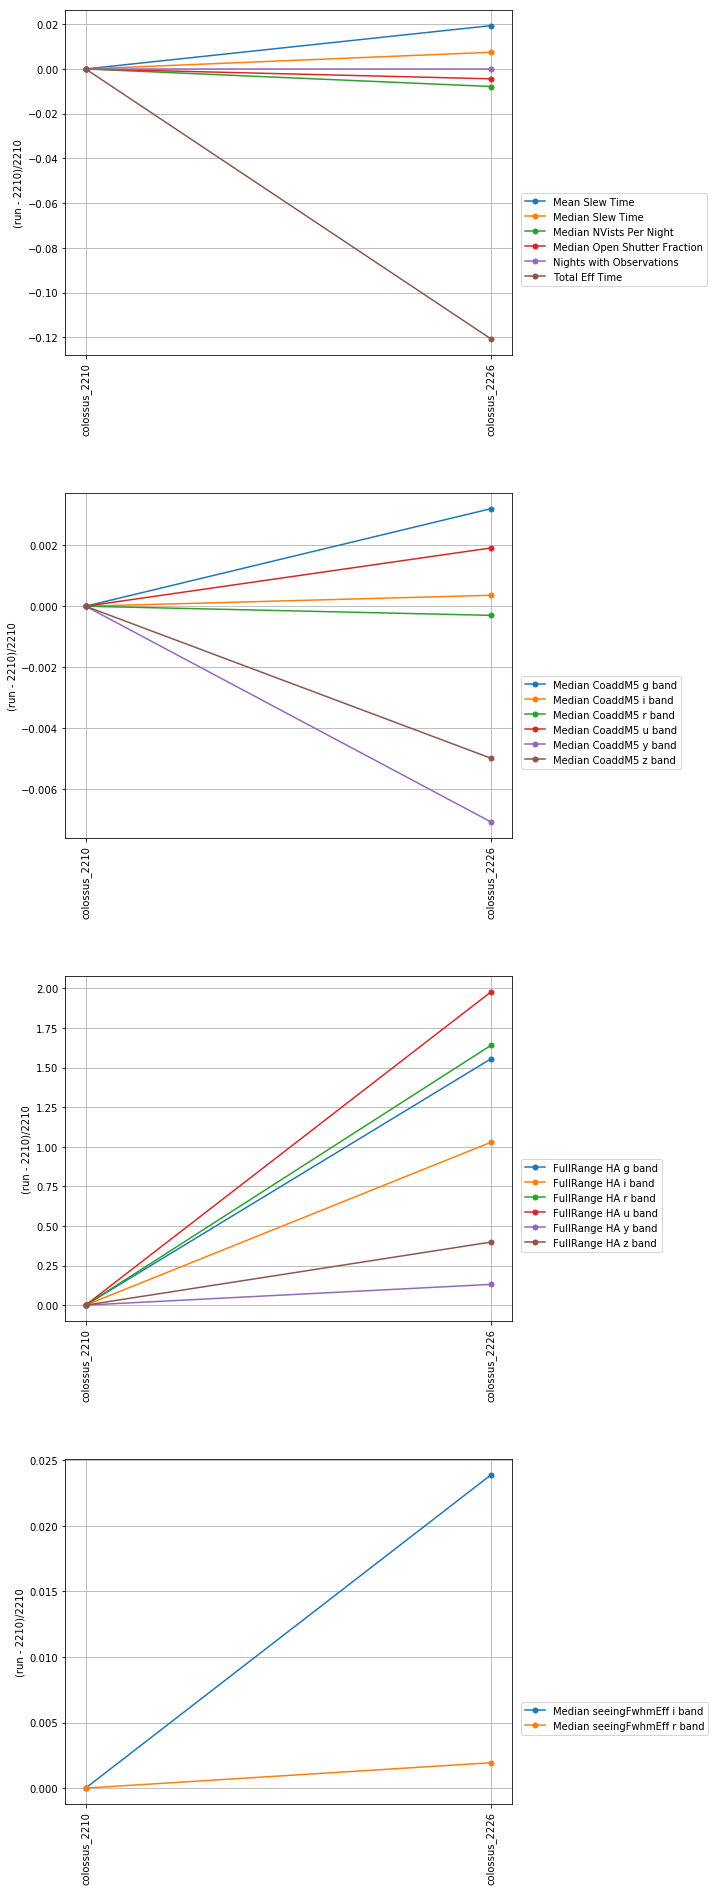

In [16]:
standardrunCompPlots(stats_df_norm,'numvists_comp.pdf')